<a href="https://colab.research.google.com/github/prudhvinathreddymalla/Generative-Deep-Learning/blob/main/01_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

In [6]:
# loads the cifar10 dataset.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


x_train is of shape (50000, 32, 32, 3) and x_test is with shape (10000, 32, 32, 3). y_train and y_test are with shape (50000, 1) and (10000, 1) respectively with integer labels in the range 0 to 9 for class of each image. 

In [10]:
num_classes = 10

By default, the image data consists of integers between 0 to 255 for each pixel channel. Neural Networks work best each input is inside the range -1 to 1. So we divide by 255.

In [16]:
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32')/255.0

We also need to change the integer labeling of the images to one hot encoded vectors. The new shape of y_train and y_test is (50k, 10) and (10k, 10) after one hot encoding. 

In [17]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [19]:
print('new shape of y_train:', y_train.shape)
print('new shape of y_test:', y_test.shape)

new shape of y_train: (50000, 10)
new shape of y_test: (10000, 10)


From the shape of image data in x_train; [50000, 32, 32, 3].
From this, 
- the 50000 represents the index of the image in the dataset. 
- 32, 32 represents the size of the image.
- 3, the last one, is the channel (i.e, red, green, blue). 
There are no columns or images in this dataset. Instead it is tensor with four dimensions. 


In [20]:
x_train[35, 12, 13, 1]

0.00092272204

Building the model: We use Functional API as it gives more flexibility in designing deep neural networks. 

In [24]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

In [26]:
input_layer = Input(shape=(32, 32, 3))

x = Flatten()(input_layer)
x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)

In [27]:
output_layer = Dense(units = 10, activation = 'softmax')(x)

In [28]:
model = Model(input_layer, output_layer)

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In the above summary, it is shown as 'none' because, the number of observations that will be passed into network is still unknown. 

Compiling the model. 

In [34]:
from tensorflow.keras.optimizers import Adam

In [39]:
opt = Adam(lr = 1e-3)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Training the model


batch_size determines how many observations will be passed to the network at each training step. 
epochs determine how many times the network will be shown the full training data.
shuffle = True, the batches will be drawn randomly without replacement from the trainig data at each training step. 

In [41]:
model_history = model.fit(x_train, y_train, batch_size=32, epochs = 10, validation_split = 0.2, shuffle = True)

Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1765 - accuracy: 0.5806 - val_loss: 1.2980 - val_accuracy: 0.5407
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1616 - accuracy: 0.5867 - val_loss: 1.3443 - val_accuracy: 0.5311
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1487 - accuracy: 0.5894 - val_loss: 1.3804 - val_accuracy: 0.5204
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1337 - accuracy: 0.5957 - val_loss: 1.3240 - val_accuracy: 0.5329
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1195 - accuracy: 0.6012 - val_loss: 1.2842 - val_accuracy: 0.5494
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1058 - accuracy: 0.6058 - val_loss: 1.3425 - val_accuracy: 0.5316
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0972 - accuracy: 0.6070 - val_loss: 1.2975 - val_accuracy

Evaluate the model

In [46]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4101 - accuracy: 0.5174


[1.4100940227508545, 0.5174000263214111]

Predictions using Predict method

In [49]:
Classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
Classes

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [58]:
preds = model.predict(x_test) # this returns an array of shape [10000, 10] i.e. a vector of 10 class probabilities for each observation
preds_single = Classes[np.argmax(preds, axis = -1)] # we convert this array of probabilities back into a single prediction using argmax function. axis = -1 tells the function to collapse the array over the last dimension, so that the shape of preds_single is [10000, 1]
actual_single = Classes[np.argmax(y_test, axis = -1)]

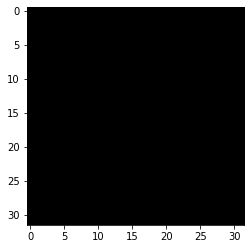

In [67]:
plt.imshow(x_test[1])

plotting the exact images to check the prediction

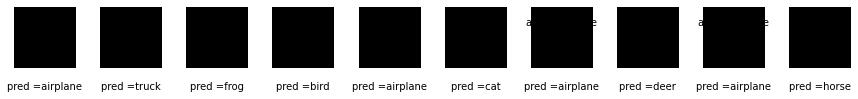

In [59]:
n_to_show = 10
indicies = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indicies):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred =' + str(preds_single[idx]), fontsize= 10, ha='center', transform =ax.transAxes)
  ax.text(0.5, 0.7, 'act = ' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
  ax.imshow(img)

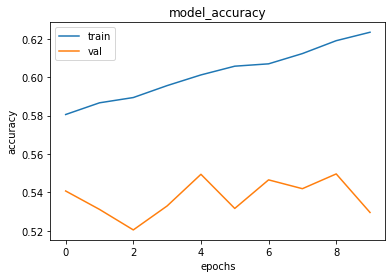

In [44]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc = 'best')
plt.show()

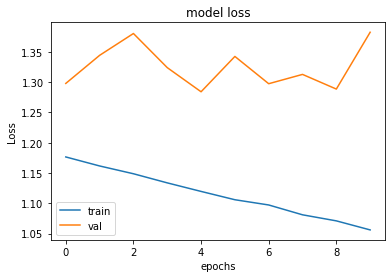

In [45]:
#plotting losses
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc = 'best')
plt.show()